# Imports

In [1]:
#tabular manipulation
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#custom modules
import acquire
import prepare
from env import host, user, password

#remove warnings
import warnings
warnings.filterwarnings("ignore")

# Acquire using .txt file

In [2]:
#custom function from acquire.py
df = acquire.get_data("anonymized-curriculum-access-07-2021.txt", ['date', 'endpoint', 'user_id', 'cohort_id', 'source_ip'])

In [3]:
#take a look at the data
df.head()

,date,endpoint,user_id,cohort_id,source_ip
0,2018-01-26,/,1,8.0,97.105.19.61
1,2018-01-26,java-ii,1,8.0,97.105.19.61
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


In [4]:
#look at size, dtypes, nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018810 entries, 0 to 1018809
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   date       1018810 non-null  object 
 1   endpoint   1018809 non-null  object 
 2   user_id    1018810 non-null  int64  
 3   cohort_id  965313 non-null   float64
 4   source_ip  1018810 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 38.9+ MB


In [5]:
df.isnull().sum()

date             0
endpoint         1
user_id          0
cohort_id    53497
source_ip        0
dtype: int64

# Acquire using SQL database

In [6]:
#custom function from acquire.py
df2 = acquire.get_sql_data()

In [7]:
#take a look
df2.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0


In [8]:
#look at size, nulls and dtypes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        900223 non-null  object 
 1   time        900223 non-null  object 
 2   path        900222 non-null  object 
 3   user_id     900223 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          900223 non-null  object 
 6   id          847330 non-null  float64
 7   name        847330 non-null  object 
 8   slack       847330 non-null  object 
 9   start_date  847330 non-null  object 
 10  end_date    847330 non-null  object 
 11  created_at  847330 non-null  object 
 12  updated_at  847330 non-null  object 
 13  deleted_at  0 non-null       object 
 14  program_id  847330 non-null  float64
dtypes: float64(3), int64(1), object(11)
memory usage: 103.0+ MB


In [9]:
df2.isnull().sum()

date               0
time               0
path               1
user_id            0
cohort_id      52893
ip                 0
id             52893
name           52893
slack          52893
start_date     52893
end_date       52893
created_at     52893
updated_at     52893
deleted_at    900223
program_id     52893
dtype: int64

### Takeaways from Acquire:
- .txt file appears to have:
    - 6 columns
    - object, int, float datatypes
    - many nulls in 'cohort_id'
    
    <br>
    
- SQL dataframe appears to have:
    - 15 columns
    - float, int, object datatypes
    - nulls in several columns
    - no data in 'deleted_at' column (possibly delete)

**we have decided to use SQL data**

<hr style="border:2px solid black"> </hr>

# Prepare

In [10]:
df = prepare.prep_df(df2)

In [11]:
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,
2018-01-26,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26,javascript-i/conditionals,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2


In [12]:
df.isnull().sum()

path          0
user_id       0
cohort_id     0
ip            0
name          0
start_date    0
end_date      0
created_at    0
updated_at    0
program_id    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 to 2021-04-21
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        900223 non-null  object        
 1   user_id     900223 non-null  int64         
 2   cohort_id   900223 non-null  int64         
 3   ip          900223 non-null  object        
 4   name        900223 non-null  object        
 5   start_date  900223 non-null  datetime64[ns]
 6   end_date    900223 non-null  datetime64[ns]
 7   created_at  900223 non-null  datetime64[ns]
 8   updated_at  900223 non-null  datetime64[ns]
 9   program_id  900223 non-null  int64         
dtypes: datetime64[ns](4), int64(3), object(3)
memory usage: 75.5+ MB


### Takeaways from Prepare:
- Final dataframe is:
    - 11 columns
    - object, int, and datatime datatypes

In [14]:
#make sure all dtypes are correct
df.dtypes

path                  object
user_id                int64
cohort_id              int64
ip                    object
name                  object
start_date    datetime64[ns]
end_date      datetime64[ns]
created_at    datetime64[ns]
updated_at    datetime64[ns]
program_id             int64
dtype: object

<hr style="border:2px solid black"> </hr>

# Explore

**Questions:**
1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
5. Which lessons are least accessed?

In [15]:
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,
2018-01-26,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26,javascript-i/conditionals,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2


In [16]:
# resample daily counts for number of page views

pages = df['path'].resample('d').count()
pages.head()

date
2018-01-26    572
2018-01-27    230
2018-01-28    170
2018-01-29    830
2018-01-30    652
Freq: D, Name: path, dtype: int64

<AxesSubplot:xlabel='date'>

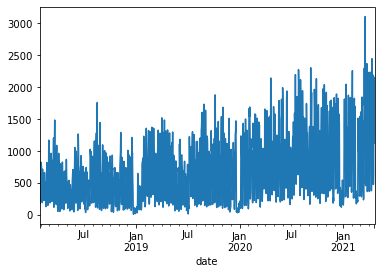

In [17]:
#visualize pages
pages.plot()

#shows a spike in access around april

#### #5 Which lessons are least accessed?

In [18]:
#how many different paths are there
df.path.nunique()

2314

In [19]:
#correct labels on df to match values
#shows how many times each path shows up
df.path.value_counts(dropna=False).sort_values(ascending=True).reset_index().rename(columns ={'index': 'path', 'path': 'count'})

,path,count
0,0,1
1,content/jquery/events/gitbook/images/favicon.ico,1
2,appendix/cli/moving-files,1
3,content/examples/javascript/conditionals.html,1
4,8-timeseries/1-overview,1
...,...,...
2309,java-iii,13733
2310,toc,18297
2311,javascript-i,18983
2312,search/search_index.json,19519


In [20]:
#create new df to get the counts of path in the dataset
path_df = pd.DataFrame(df.path.value_counts(dropna=False)).reset_index().\
                rename(columns ={'index': 'path', 'path': 'count'})

In [21]:
path_df.head()

,path,count
0,/,50313
1,search/search_index.json,19519
2,javascript-i,18983
3,toc,18297
4,java-iii,13733


In [22]:
# calculate probabity for each path
#ip_prob = count for each path / total count in the dataframe
#each count divided by total

#new variable that takes df and value counts/total count (proba)
#rename columns
path_df2 = pd.DataFrame((df.path.value_counts(dropna=False))/df.path.count()).reset_index().\
                rename(columns={'index': 'path', 'path': 'path_proba'})
path_df2.head()

,path,path_proba
0,/,0.055889
1,search/search_index.json,0.021682
2,javascript-i,0.021087
3,toc,0.020325
4,java-iii,0.015255


In [23]:
# merge the two data frames create above into a single one:
#includes count and probability dfs
path_df = path_df.merge(path_df2)
path_df.head()

,path,count,path_proba
0,/,50313,0.055889
1,search/search_index.json,19519,0.021682
2,javascript-i,18983,0.021087
3,toc,18297,0.020325
4,java-iii,13733,0.015255


In [24]:
# look at rows where ip_proba is less than 0.01
path_df[path_df.path_proba < 0.01]

,path,count,path_proba
12,appendix,8308,0.009229
13,javascript-i/introduction/working-with-data-ty...,7642,0.008489
14,mysql/tables,7356,0.008171
15,javascript-i/javascript-with-html,7350,0.008165
16,javascript-i/functions,7348,0.008162
...,...,...,...
2309,elements/html,1,0.000001
2310,instructors,1,0.000001
2311,jacascript-i/introdection,1,0.000001
2312,Explore_Lesson,1,0.000001


In [25]:
#see how frequently each were accessed
path_df.describe()

,count,path_proba
count,2314.000000,2314.000000
mean,389.033276,0.000432
std,1729.488362,0.001921
min,1.000000,0.000001
25%,2.000000,0.000002
50%,12.000000,0.000013
75%,130.750000,0.000145
max,50313.000000,0.055889


In [26]:
#shows the paths that have a path of greater than 12 (median count)
#least 5 visited sites
df.path.value_counts().reset_index(name='count').query('count > 12')['index'].tolist()[-6:]

['7-clustering/2-about',
 '10.02.04_EntityLabeling',
 '6-regression/3.4-feature-engineering',
 'content/laravel/more-features/db-relationships.html',
 '6-classification/6.2-decision-trees',
 '6-regression/3.0-evaluation']

In [27]:
viz_most_df = path_df.merge(path_df2).head(10)

In [28]:
viz_most_df

,path,count,path_proba
0,/,50313,0.055889
1,search/search_index.json,19519,0.021682
2,javascript-i,18983,0.021087
3,toc,18297,0.020325
4,java-iii,13733,0.015255
5,html-css,13635,0.015146
6,java-ii,12685,0.014091
7,spring,12524,0.013912
8,jquery,11525,0.012802
9,mysql,11033,0.012256


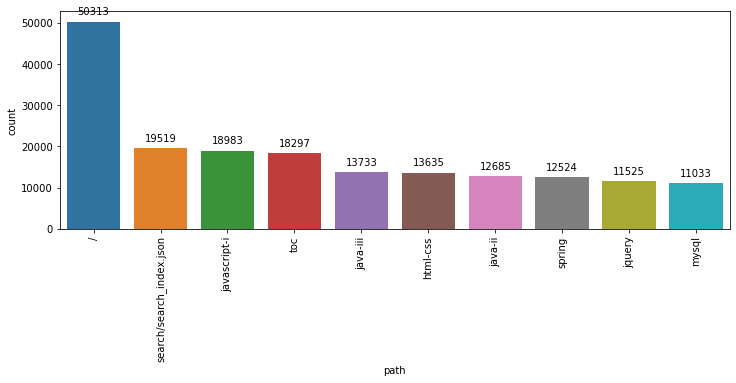

In [29]:
# plot the path for each path

#visualize the path and count of each login
#exponential decay
plt.figure(figsize=(12, 4))
splot = sns.barplot(data=viz_most_df, x = 'path', y = 'count', ci = None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), 
                   textcoords = 'offset points'
                   )
    plt.xticks(rotation='vertical')

In [30]:
viz_least_df = path_df.merge(path_df2).tail(10)

In [31]:
viz_least_df

,path,count,path_proba
2304,10-anomaly-detection/2-continuous-probabilisti...,1,0.000001
2305,Correlation.md,1,0.000001
2306,cli/4-navigating-the-filesystem,1,0.000001
2307,java-i/control-statements-and-loops/g,1,0.000001
2308,query/personal-site,1,0.000001
2309,elements/html,1,0.000001
2310,instructors,1,0.000001
2311,jacascript-i/introdection,1,0.000001
2312,Explore_Lesson,1,0.000001
2313,0,1,0.000001


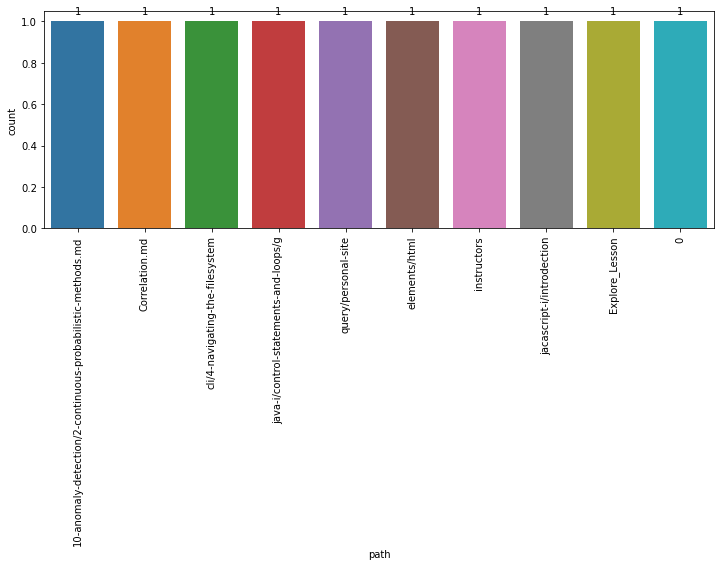

In [32]:
# plot the path for each 

#visualize the path and count of each login
#exponential decay
plt.figure(figsize=(12, 4))
splot = sns.barplot(data=viz_least_df, x = 'path', y = 'count', ci = None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), 
                   textcoords = 'offset points'
                   )
    plt.xticks(rotation='vertical')

### Takeaways:
- The least visited curriculum pages are:
    - 5-stats/sampling
    - 7-clustering/3-wrangle
    - capstone-workbook
    - professional-development/professionalism-101
    - 12-distributed-ml/4-acquire
    - 10_Appendix_EntityLabeling']

<hr style="border:2px solid black"> </hr>

#### #4 What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [33]:
df.loc[(df['end_date']) < (df['created_at'])]

#95,659 out of 900,223 accessed curriculum after graduation
#10.63%

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,
2018-01-26,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26,/,11,1,97.105.19.61,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1
...,...,...,...,...,...,...,...,...,...,...
2021-04-21,jquery/personal-site,64,28,71.150.217.33,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2
2021-04-21,jquery/mapbox-api,64,28,71.150.217.33,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2
2021-04-21,jquery/ajax/weather-map,64,28,71.150.217.33,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2


In [34]:
#sort by program
df.groupby('program_id')

In [35]:
#see the different program options
df['program_id'].unique()

array([1, 2, 0, 4, 3])

In [36]:
#see most accessed by program
path_by_prog = df.groupby(['program_id']).path.value_counts(ascending=True)
path_by_prog

program_id  path                                            
0           1-fundamentals/2.1-excel-overview                      1
            1-fundamentals/2.1-intro-to-excel                      1
            1-fundamentals/3-vocabulary                            1
            10-anomaly-detection/5-detecting-with-clustering       1
            10-anomaly-detection/exercises                         1
                                                                ... 
3           /                                                   8358
4           /                                                      1
            content/html-css/gitbook/images/favicon.ico            1
            content/html-css/introduction.html                     1
            content/html-css                                       2
Name: path, Length: 4422, dtype: int64

In [37]:
df[(df.end_date) < (df.created_at)][['program_id', 'path']].value_counts().sort_values()

program_id  path                                                    
2           6.04.07_Ensemble                                               1
            content/php_iv/exceptions/gitbook/images/favicon.ico           1
            content/php_iv/exceptions                                      1
            content/php_iii/php-with-html/gitbook/images/favicon.ico       1
            content/php_iii/php-with-html                                  1
                                                                        ... 
            search/search_index.json                                    1349
            java-iii                                                    1393
            spring                                                      1403
            javascript-i                                                1817
            /                                                           6340
Length: 1877, dtype: int64

In [38]:
df['post_grad_access'] = df.index > df.end_date

In [39]:
df['post_grad_access'] = df['post_grad_access'].astype(int)

In [40]:
post_grad = df.loc[df['post_grad_access'] == 1]

In [41]:
post_grad.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,post_grad_access
date,,,,,,,,,,,
2018-01-26,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,1
2018-01-26,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,1
2018-01-26,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,1
2018-01-26,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,1
2018-01-26,/,11,1,97.105.19.61,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1,1


In [42]:
#as per instructor, program 4 is not of value, it is a test program
program_list = [1,2,3,4]

In [43]:
for prog in program_list:
    program_df = pd.DataFrame(post_grad[post_grad.path != '/']).groupby('program_id')['path'].value_counts()
    cep_df = program_df.loc[[prog]]
    cep_df = cep_df.nlargest(4)
    print(cep_df)
    print('\n')
    print('----------------------')

program_id  path        
1           index.html      1011
            javascript-i     736
            html-css         542
            spring           501
Name: path, dtype: int64


----------------------
program_id  path                    
2           javascript-i                4229
            spring                      3760
            search/search_index.json    3562
            html-css                    3136
Name: path, dtype: int64


----------------------
program_id  path                                    
3           search/search_index.json                    493
            sql/mysql-overview                          275
            classification/overview                     266
            classification/scale_features_or_not.svg    219
Name: path, dtype: int64


----------------------
program_id  path                                       
4           content/html-css                               2
            content/html-css/gitbook/images/favicon.ico    1
     

### Most Accessed Curriculum Post-Grad

- Program 1 (PHP):
    - javascript-i
    - html-ss
    - spring
    
    <br>
    
- Program 2 (Java):
    - javascript-i
    - spring
    - html-ss
    
    <br>
    
- Program 3 (Data Science):
    - my_sql overview
    - classification/overview
    - classification/scale_features_or_not

<hr style="border:2px solid black"> </hr>

#### #3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [44]:
#create a column of users that accessed curriculum while active
df['user_access'] = (df.index < df.end_date) & (df.index > df.start_date)

In [45]:
#turn that column into  bool
df['user_access'] = df['user_access'].astype(int)

In [46]:
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,post_grad_access,user_access
date,,,,,,,,,,,,
2018-01-26,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,1,0
2018-01-26,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,1,0
2018-01-26,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,1,0
2018-01-26,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,1,0
2018-01-26,javascript-i/conditionals,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,0,1


In [47]:
#call only users who accessed curriculum while active
user_access_df = df.loc[df['user_access'] == 1]

In [48]:
#turn that into a DF
user_df = pd.DataFrame(user_access_df).groupby('user_id')['path'].value_counts()

In [49]:
user_df.head()

user_id  path    
2        /           68
         java-iii    50
         mysql       32
         java-ii     30
         spring      29
Name: path, dtype: int64

In [50]:
#identify unique users in a list
user_list = df.user_id.unique().tolist()

In [51]:
#set variable to active users sorted by user id
least_accessed = user_access_df.sort_values('user_id')

In [52]:
#take a look 
least_accessed.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,post_grad_access,user_access
date,,,,,,,,,,,,
2018-01-26,javascript-i/conditionals,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,0,1
2018-03-14,java-i/strings,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,0,1
2018-04-20,spring/fundamentals/relationships,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,0,1
2018-03-14,java-i/methods,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,0,1
2018-03-14,java-i,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,0,1


In [63]:
#these are the 10 users who accessed the curriculum the least
least_accessed['user_id'].value_counts().tail(20)

972    31
41     28
24     26
49     25
64     25
976    25
772    20
961    18
963    17
487    17
889    16
968    16
572    12
388     8
812     7
956     5
278     4
832     3
679     3
879     1
Name: user_id, dtype: int64

### Break down the bottom 5 users

In [66]:
#user_id: 879
least_accessed.loc[least_accessed['user_id']== 879]

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,post_grad_access,user_access
date,,,,,,,,,,,,
2021-01-26,/,879,135,136.50.50.187,Marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,2,0,1


#### Takeaway:
- user 879:
    - accessed the curriculum only once
    - was in program 2, cohort 135
    - never accessed curriculum after graduation date
        - likely did not graduate (created and updated same day)

In [55]:
#user_id: 679
least_accessed.loc[least_accessed['user_id']== 679]

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,post_grad_access,user_access
date,,,,,,,,,,,,
2020-07-14,1-fundamentals/1.1-intro-to-data-science,679,59,24.28.146.155,Darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,3,0,1
2020-07-14,1-fundamentals/modern-data-scientist.jpg,679,59,24.28.146.155,Darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,3,0,1
2020-07-14,1-fundamentals/AI-ML-DL-timeline.jpg,679,59,24.28.146.155,Darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,3,0,1


#### Takeaway:
- user 679:
    - accessed the curriculum three times
    - was in program 3, cohort 59
    - never accessed curriculum after graduation date
        - likely did not graduate (created and updated same day)

In [56]:
#user_id: 832
least_accessed.loc[least_accessed['user_id']== 832]

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,post_grad_access,user_access
date,,,,,,,,,,,,
2020-12-07,/,832,62,69.154.52.98,Jupiter,2020-09-21,2021-03-30,2020-09-21 18:06:27,2020-09-21 18:06:27,2,0,1
2020-12-07,javascript-i,832,62,69.154.52.98,Jupiter,2020-09-21,2021-03-30,2020-09-21 18:06:27,2020-09-21 18:06:27,2,0,1
2020-12-07,html-css,832,62,69.154.52.98,Jupiter,2020-09-21,2021-03-30,2020-09-21 18:06:27,2020-09-21 18:06:27,2,0,1


#### Takeaway:
- user 832:
    - accessed the curriculum three times
    - was in program 2, cohort 62
    - never accessed curriculum after graduation date
        - likely did not graduate (created and updated same day)

In [57]:
#user_id: 278
least_accessed.loc[least_accessed['user_id']== 278]

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,post_grad_access,user_access
date,,,,,,,,,,,,
2018-09-27,java-ii/arrays,278,24,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,0,1
2018-09-27,/,278,24,97.105.19.58,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,0,1
2018-09-27,java-ii/arrays,278,24,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,0,1
2018-09-27,java-ii/collections,278,24,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,0,1


#### Takeaway:
- user 278:
    - accessed the curriculum four times
    - was in program 2, cohort 24
    - never accessed curriculum after graduation date
        - likely did not graduate (created and updated same day)

In [58]:
#user_id: 956
least_accessed.loc[least_accessed['user_id']== 956]

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,post_grad_access,user_access
date,,,,,,,,,,,,
2021-04-15,javascript-i/introduction/operators,956,139,162.200.114.251,Oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,2,0,1
2021-04-15,javascript-i/introduction/primitive-types,956,139,162.200.114.251,Oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,2,0,1
2021-04-15,toc,956,139,162.200.114.251,Oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,2,0,1
2021-04-15,/,956,139,162.200.114.251,Oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,2,0,1
2021-04-15,javascript-i/introduction/operators,956,139,162.200.114.251,Oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,2,0,1


#### Takeaway:
- user 956:
    - accessed the curriculum three times
    - was in program 2, cohort 139
    - never accessed curriculum after graduation date
        - likely did not graduate (created and updated same day)

### Takeaways:
- The five users that accessed curriculum the least were most commonly from Program 2 (4 out of 5)